# Convolutional Neural Networks

Ahhhh yes. 

Pictures, videos. 

How do we process these things? When you go on Instagram and you turn on the fancy little *vintage* filter, how is this done? 

Believe it or not, this involves **Deep Learning**!!

## The problem with ANNs

Remember that the MNIST dataset was very nicely preprocessed and centred. All the image are 28x28 pixels 

If we use a larger image, there will be **WAY TOO MANY PARAMETERS** if we just the same old linear NN. 

This makes the data
- Harder to train 
- More data needed to generalize

And most importantly, **flattening the image ignores geometry of image data**! And, different image sizes require different models. 

## Convolution Operator

Mathematically we can follow this algorithm. 

1. Multiply each pixel in $I$ in range of kernel by the **corresponding element of kernel K** 
2. **Sum all these products** and write to a new 2d array 
3. Slide kernel across **all areas** of the image until you reach the end

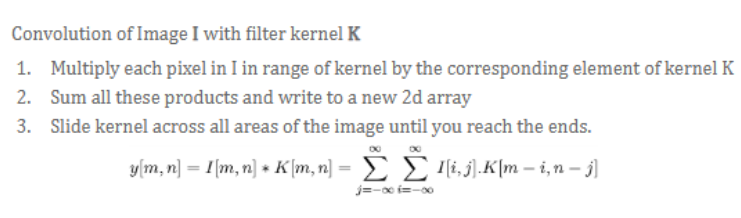

### Don't worry it's best shown with a diagram!

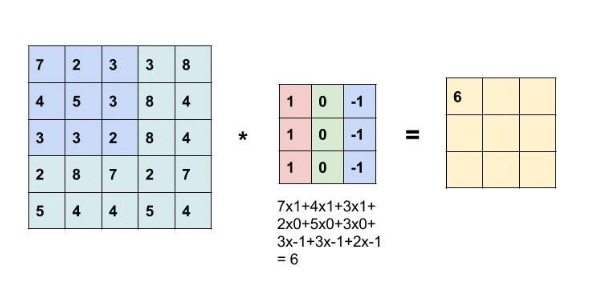

## Example: Averaging/Blurring Filter

This is like what you'd see on Instagram! 

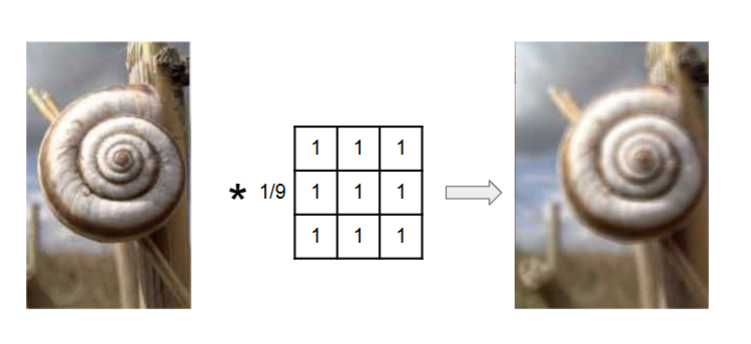

The blurring would **average out** pixel intensities in the image. 

## Introduction to CNNs

Like we said before, sticking with MLPs requires us to preprocess the input and this is **annoying**. 

For **CNNs**, we apply convolution to **image tensors**.

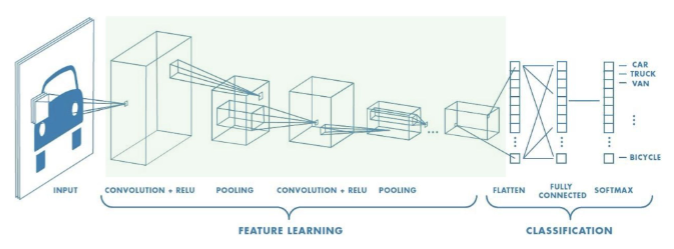

## During Forward and Backward Passes 
- Kernels are **initailized randomly**
- **Convolve the image** with the kernel in forward pass, and update the kernel using **gradients** in backward pass. 

## Zero Padding 
- Adds zeros around border of image before convolution. 
- Keeps information around border of the image. 

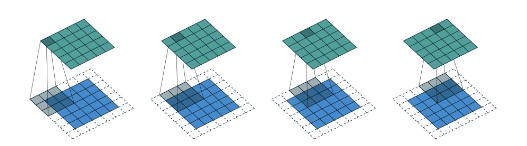

## Stride 

Distance between two consecutive positons; allows controlling output resolution

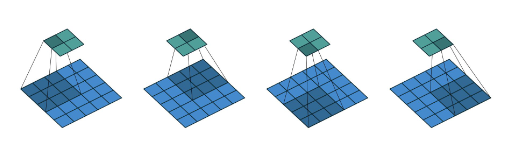
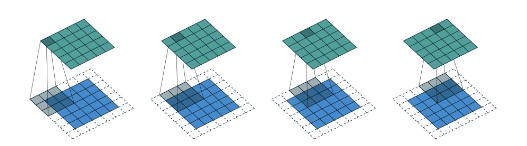

## Output Size Calculation Formula

For each dimension of an input image with 
- Image dimension of size $i$ 
- Kernel of size $k$ 
- Padding of size $p$ 
- Stride of size $s$ 

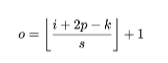


## RGB!!!

Man of course. We need colors in our lives, right? 

This just means the kernel becomes a **3-dimensional tensor** 

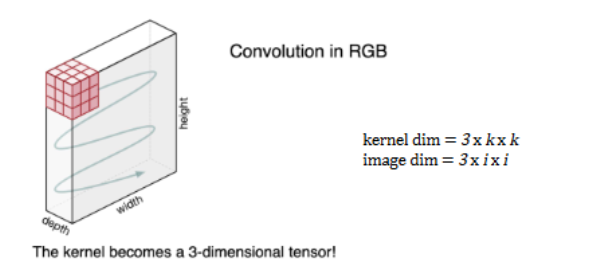

Note that for RGB, you have **3 input features**!

## Now for example, if we want 5 output features:

Color input image: 3 x 28 x 28 

Convolution Kernels:  5 x 3 x 8 x8 

## Pooling Operator 

This consolidates information and **removes information** not useful for the current task. 

The three ways to do this 
1. Strided convolutions 
2. Max Pooling 
3. Average Pooling 

## Max Pooling 

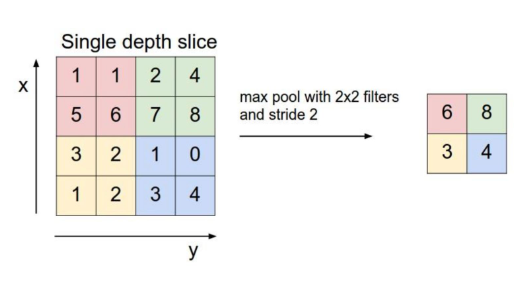

## Average Pooling 
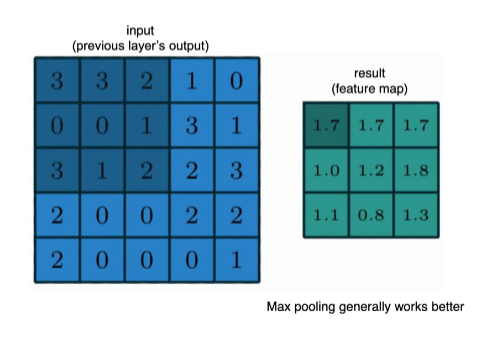

## Now Generally.... 
As we go through the CNN Network 
- The **filter depth increases** 
- The feature map **height and width** decreases. 

In [ ]:
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__() 
        self.name = "large"
        self.conv1 = nn.Conv2d(3, 5, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(5, 10, 5)
        self.fc1 = nn.Linear(10\*5\*5, 32)
        self.fc2 = nn.Linear(32, 10)
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 10*5*5)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

## Data Augmentation 

This is a technique to add variances to the input **without changing the class** 

Adding this extra noise would **help generalization** by learning internal representation of transformations! 



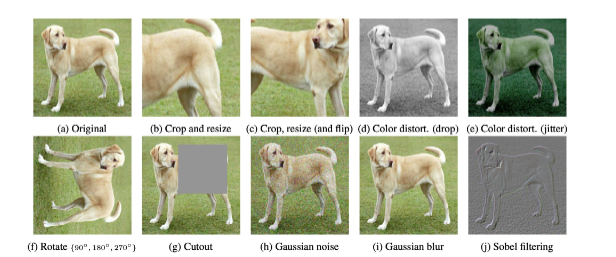

## Tackling the Vanishing/Exploding Gradient 

The CNNs that were creating in the mid-2010s implemented some neat tricks to tackle this problem! 

## Pointwise (1x1) Convolution 

- **Pixel-wise** linear transformation, learns a **non-linear** pixelwise transformation 
- Maps CNN feature maps to a higher/lower dimension space. 
- Used to learn compact representations/compressions

## Auxiliary Loss/Intermediate Losses
Adding classifiers in the **intermediate layers** such that the final loss is a **combination** of the intermediate losses and the final loss. 

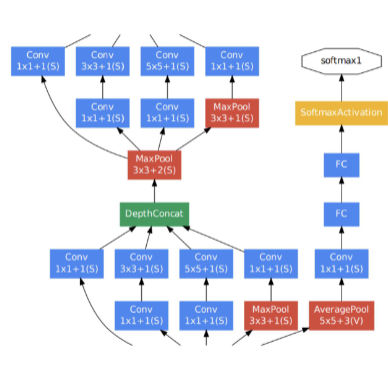


## ResNet and Residual Networks 

Even with **Batch Normalization** and **ReLUs**, training deep networks is difficult! 

You can utilize **skip connections** to provider deeper layers more direct access to signals, which otherwise **might be lost to vanishing gradients**. 

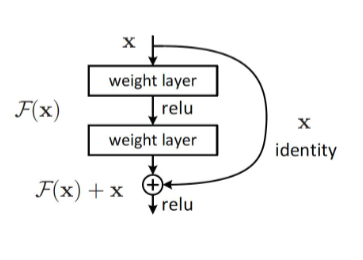

## Transfer Learning 

Usually your CNN has two distinct parts: 

- **Convolutional Layers** --> Learn filters across spatial and channels dimensions 
- **Fully-Connected Layers** --> Learn to classify images based on learned visual features. 

When the parts intersect, these are **embeddings** ---- learned lower-dimensional set of "visual feature" representing the image. 

The idea is CNNs learn something general about representing images!

## Transfer Learning using Embeddings 
The idea is to remove the classification layers at end of model and **freeze remaining weights** 

Add and train **new layers at end** of model suitable for our new task. 

Usually you would freeze the original model's weights, and used the CNN layers as a feature extractor. You can also **train original model weights** on a **lower learning rate**

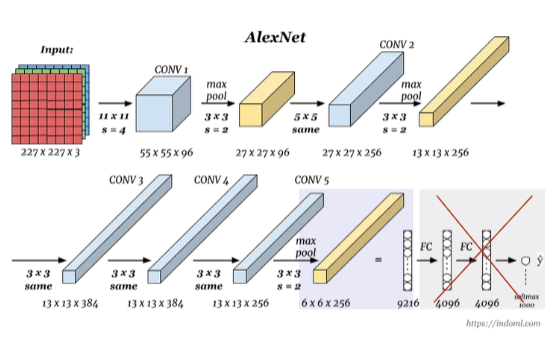